In [326]:
from PIL import Image
import glob
import pandas as pd
import cv2
from keras.utils import np_utils
import numpy as np
#from keras.preprocessing import image
from tensorflow.keras.preprocessing import image

width = 224
height = 224
image_list = np.zeros((295,width,height,3))
klasa = []

dim = (width, height)

for st,filename in  enumerate(glob.glob('./Amanita_muscaria/*')): 
    im=cv2.imread(filename, cv2.IMREAD_ANYCOLOR)
    im = cv2.resize(im,dim)
    im = np.reshape(im,[1,224,224,3])
    image_list[st]=im
    klasa.append(0)
    
    
for st,filename in  enumerate(glob.glob('./Boletus_badius/*')): 
    im=cv2.imread(filename, cv2.IMREAD_ANYCOLOR)
    im = cv2.resize(im,dim)
    im = np.reshape(im,[1,224,224,3])
    image_list[st+81]=im
    klasa.append(1)


for st,filename in  enumerate(glob.glob('./Cantharellus_cibarius/*')): 
    im=cv2.imread(filename, cv2.IMREAD_ANYCOLOR)
    im = cv2.resize(im,dim)
    im = np.reshape(im,[1,224,224,3])
    image_list[st+203]=im    
    klasa.append(2)

klasa=np.array(klasa)
#print(image_list[245])

#print(len(klasa), '--- sliki:',len (image_list)) 
#print(klasa[0], image_list[0].shape)
#data.head(-10)


In [327]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_list, klasa, test_size=0.3, random_state=789)
x_train.reshape(-1,224,224,3)
print(x_train.dtype, x_train.shape)
print(y_train.dtype, y_train.shape)

print(x_test.dtype, x_test.shape)
print(y_test.dtype, y_test.shape)


float64 (206, 224, 224, 3)
int32 (206,)
float64 (89, 224, 224, 3)
int32 (89,)


In [328]:
import numpy as np
import tensorflow as tf
num_classes = len(np.unique(y_train))
print(num_classes)


# normalize inputs from 0-255 to 0-1
X_train = x_train / 255
X_test = x_test / 255


y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)





3


In [329]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_data_format('channels_last')



In [331]:
def my_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(224, 224,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [332]:
model = my_model()
model.fit( x_train,y_train, validation_data=(x_test,y_test), epochs=13, batch_size=1)

Epoch 1/13
  5/206 [..............................] - ETA: 4:26 - loss: 14765.4795 - accuracy: 0.6000

KeyboardInterrupt: 

3/3 [==============================] - 1s 306ms/step
Accuracy score:  0.23595505617977527
Precision: [0.         0.         0.23595506]
Recall: [0. 0. 1.]
F1-score: [0.         0.         0.38181818]


c:\PYTHON\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


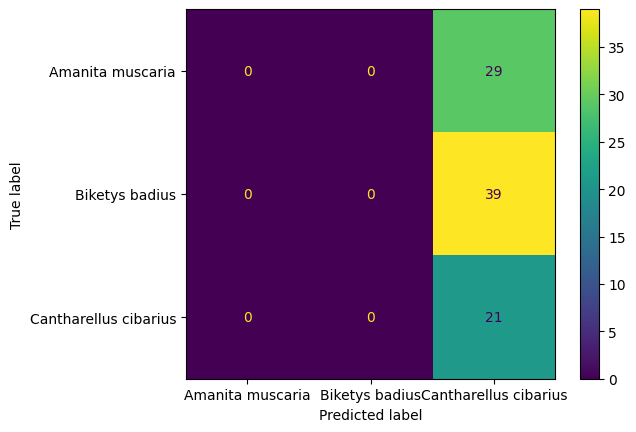

In [333]:
from sklearn import metrics
import matplotlib.pyplot as plt
res = model.predict(x_test)
results=[]
for el in res:
    if el[0]>=el[1] and el[0]>=el[2]:
        results.append(0)
    elif el[1]>=el[0] and el[1]>=el[2]:
        results.append(1)
    else:
        results.append(2)
values=[]
for el in y_test:
    if el[0]>=el[1] and el[0]>=el[2]:
        values.append(0)
    elif el[1]>el[0] and el[1]>=el[2]:
        values.append(1)
    else:
        values.append(2)

confusion_matrix = metrics.confusion_matrix(values, results)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Amanita muscaria", "Biketys badius","Cantharellus cibarius"])
#print(results,values)            
print('Accuracy score: ',metrics.accuracy_score(values, results)) # Izpišemo točnost algoritma
print('Precision:', metrics.precision_score(values, results, average=None)) # Izpiše skupen precision
print('Recall:', metrics.recall_score(values, results, average=None)) # Izpiše skupen recall
print('F1-score:', metrics.f1_score(values, results, average=None)) # Izpiše skupen F1-score

cm_display.plot()
plt.show()
#print('Matrika zmede:', metrics.ConfusionMatrixDisplay(values ,results, labels=["Amanitamuscaria", "Boletus badius", "Cantharellus cibarius"]))
